In [1]:
import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'

In [2]:
import matplotlib.pyplot as plt
import cv2
import sys
from PIL import Image 
import PIL 
from pylab import rcParams
from IPython.display import Image
import easyocr
import re
import json
import camelot
import pytesseract
from pdf2image import convert_from_path

In [3]:
rcParams['figure.figsize'] = 8, 16
reader = easyocr.Reader(['en'])

CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


In [4]:
#NTN,Invoices,PO,Order

PDF_file = "AMI Page 138.pdf"
  
'''
Part #1 : Converting PDF to images
'''
  
# Store all the pages of the PDF in a variable
pages = convert_from_path(PDF_file, 500)
  
# Counter to store images of each page of PDF to image
image_counter = 1
  
# Iterate through all the pages stored above
for page in pages:
  
    filename = "page_"+str(image_counter)+".jpg"
      
    # Save the image of the page in system
    page.save(filename, 'JPEG',dpi=(300,300))
    #im.save("test-600.png", dpi=(600,600))
    # Increment the counter to update filename
    image_counter = image_counter + 1

'''
Part #2 - Recognizing text from the images using OCR
'''
    
# Variable to get count of total number of pages
filelimit = image_counter-1
  
# Creating a text file to write the output
outfile = "out_text.txt"
  
# Open the file in append mode so that 
# All contents of all images are added to the same file
f = open(outfile, "a")
  
# Iterate from 1 to total number of pages
for i in range(1, filelimit + 1):
  
    filename = "page_"+str(i)+".jpg"
    
  
    text = reader.readtext(filename)
    
    
    
    
    print(text)
    print("===============Type=====================",type(text))
    length=len(text)
    print("====================Length===============",length)
    
        
    texts=str(text)
    # Finally, write the processed text to the file.
    f.write(texts)
  
# Close the file after writing all the text.
f.close()

[([[3794, 17], [4223, 17], [4223, 72], [3794, 72]], 'Doc#t: FM-L3-SC-01', 0.6615055320260478), ([[67, 0], [727, 0], [727, 168], [67, 168]], 'PAXAR', 0.9653507913381469), ([[4043, 73], [4266, 73], [4266, 128], [4043, 128]], 'Issue#t: 02', 0.6286197248315419), ([[1849, 96], [2512, 96], [2512, 187], [1849, 187]], 'SALES INVOICE', 0.9986565690360795), ([[3717, 129], [4240, 129], [4240, 184], [3717, 184]], 'Issue Date: 25-10-2019', 0.6001695948187612), ([[3717, 245], [4253, 245], [4253, 300], [3717, 300]], 'Paxar Pakistan (Pvt) Ltd_', 0.8802829251126506), ([[67, 286], [1737, 286], [1737, 362], [67, 362]], 'SALES TAX REGISTRATION NO 17-50-5807-003-82', 0.8516076290794506), ([[4047, 301], [4253, 301], [4253, 356], [4047, 356]], 'Plot # 26_', 0.49182517931382186), ([[71, 367], [1050, 367], [1050, 444], [71, 444]], 'NATIONAL TAX NO 2695980-1', 0.6918012370703546), ([[4030, 356], [4253, 356], [4253, 412], [4030, 412]], 'Sector 24', 0.7813849487326464), ([[3744, 410], [4256, 410], [4256, 474], [3

In [5]:
lst=[]
for i in range(length):
    lst.append(text[i][1])


In [6]:
str1 = ' '.join(lst)
str1

"Doc#t: FM-L3-SC-01 PAXAR Issue#t: 02 SALES INVOICE Issue Date: 25-10-2019 Paxar Pakistan (Pvt) Ltd_ SALES TAX REGISTRATION NO 17-50-5807-003-82 Plot # 26_ NATIONAL TAX NO 2695980-1 Sector 24 Korangi Industrial Area, BILL TO SHIP TO NTN NO_ ARTISTIC MILLINERS (PVT) LTD: ARTISTIC MILLINERS Pvt: Ltd_ 2645727-OA Plot No. 1/A Sector 20, Korangi Industrial Area, Korangi Industrial Area GST NO. KARACHI 17-50-5205-002-82 PAKISTAN Pakistan INVOICE DATE 05-APR-22 INVOICE NO: 577732 AACCOUNT PAGE 477034 1/1 SOLD TO: BANANA REPUBLIC 106843 ORDER NO_ PO NUMBER TRACKING NO. SHIP VIA FREIGHT TERMS 74734843 EXPORT ACCOUNT Kashif Rasheed LOCAL EXW EX WORKS LINE PART NUMBERIDESCRIPTION QTY SHIPPED UOM UNIT PRICE EXTENDED PRICETAX RATE TAX AMOUNT TOTAL AMOUNT 1-264210-000-00 BANANA REPUBLIC.BR-265228-LPN- 130.00 Each 1.63 211.901 17.00, 36.02 247.92 STK ORDER NO. 74734843, Buyer PO#JIYKO PO#125632, DELIVERY INFO AVY-21720913/05-APR-22 HS Code: 4821.1090; Description: 48-a-Paper & Paperboard, Rolls Sheet

In [8]:
NTN_pattern="\d{7}-\w{2}"
NTN=re.findall(NTN_pattern,str1)
#PO correct
po_pattern="PO#\d{5,6},|PO#\d{5,6}$| PO#\d{5,6} "
po=re.findall(po_pattern,str1)
#Invoice
IN_pattern="INVOICE NO: \d{6}"
IN=re.findall(IN_pattern,str1)

#Order
Order_pattern="\d{8}"
OR=re.findall(Order_pattern,str1)
ntn=NTN[0]
ora=OR[0]


In [9]:
data_set = {#"Party_PO": [output[36][1]],
            "National_Tax_No.": ntn,
            'Invoice No':IN,
            'Ordered No':ora,
            "PO# ":po,
           # "Table ": data

           }
print(data_set)

{'National_Tax_No.': '2645727-OA', 'Invoice No': ['INVOICE NO: 577732'], 'Ordered No': '74734843', 'PO# ': ['PO#125632,', 'PO#125632,', 'PO#125632,', 'PO#125632,']}


In [10]:
#Tables
tables=camelot.read_pdf('AMI Page 138.pdf', flavor='stream', pages='1', table_areas=['5,530,620,180'])
tables


<TableList n=1>

In [11]:
tables[0].parsing_report

{'accuracy': 100.0, 'whitespace': 70.0, 'order': 1, 'page': 1}

C:\Users\Naeem\AppData\Local\Temp/ipykernel_3368/2005142002.py:1: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  camelot.plot(tables[0], kind='contour').show()


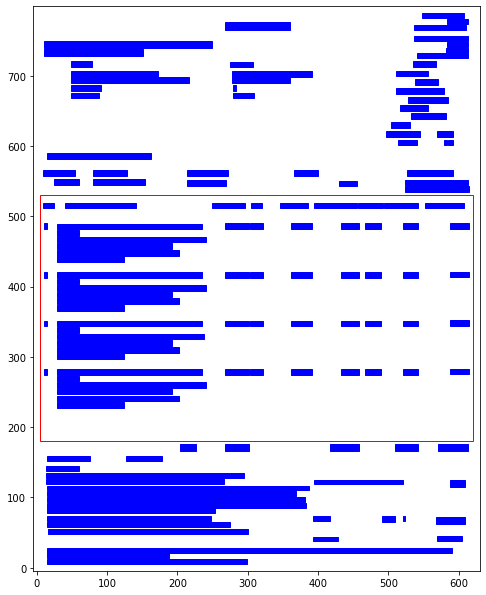

In [12]:
camelot.plot(tables[0], kind='contour').show()

C:\Users\Naeem\AppData\Local\Temp/ipykernel_3368/4233977520.py:1: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  camelot.plot(tables[0], kind='textedge').show()


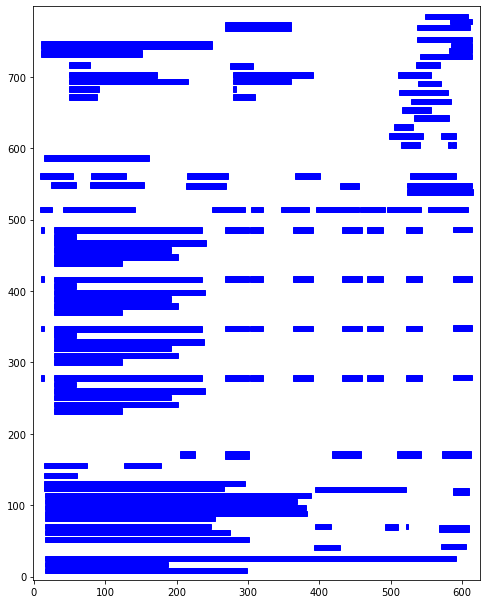

In [13]:
camelot.plot(tables[0], kind='textedge').show()

In [14]:
df=tables[0].df
df

,0,1,2,3,4,5,6,7
0,LINE,PART NUMBER/DESCRIPTION,QTY SHIPPED,UOM,UNIT PRICE,EXTENDED PRICE\nTAX RATE,TAX AMOUNT,TOTAL AMOUNT
1,1,1-264210-000-00 / BANANA REPUBLIC.BR-265228-LPN-,130.00,Each,1.63,17.00\n 211.90,36.02,247.92
2,,STK.......,,,,,,
3,,"ORDER NO. 74734843, Buyer PO#J1YK0 PO#125632,",,,,,,
4,,DELIVERY INFO : AVY-21720913/05-APR-22,,,,,,
5,,HS Code: 4821.1090; Description: 48-a-Paper &,,,,,,
6,,"Paperboard, Rolls , Sheets",,,,,,
7,2,1-264210-000-00 / BANANA REPUBLIC.BR-265228-LPN-,180.00,Each,1.63,17.00\n 293.40,49.88,343.28
8,,STK.......,,,,,,
9,,"ORDER NO. 74734843, Buyer PO#J0LP5 PO#125632,",,,,,,


In [15]:
df[5]=df[5].replace(["\n"]," ",regex=True)

In [16]:
df2 = df.iloc[0] #grab the first row for the header
df = df[1:] #take the data less the header row
df.columns = df2 #set the header row as the df header

In [17]:
df.drop(columns=['PART NUMBER/DESCRIPTION'],inplace=True)

C:\Users\Naeem\anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [18]:
df['LINE'].astype(bool)  
df=df[df['LINE'].astype(bool)]
df

,LINE,QTY SHIPPED,UOM,UNIT PRICE,EXTENDED PRICE TAX RATE,TAX AMOUNT,TOTAL AMOUNT
1,1,130.00,Each,1.63,17.00 211.90,36.02,247.92
7,2,180.00,Each,1.63,17.00 293.40,49.88,343.28
13,3,130.00,Each,1.63,17.00 211.90,36.02,247.92
19,4,308.00,Each,1.63,17.00 502.04,85.35,587.39


In [19]:
df[['TAX RATE','EXTENDED PRICE']] = df['EXTENDED PRICE TAX RATE'].str.split(' ', 1, expand=True)
df

,LINE,QTY SHIPPED,UOM,UNIT PRICE,EXTENDED PRICE TAX RATE,TAX AMOUNT,TOTAL AMOUNT,TAX RATE,EXTENDED PRICE
1,1,130.00,Each,1.63,17.00 211.90,36.02,247.92,17.00,211.90
7,2,180.00,Each,1.63,17.00 293.40,49.88,343.28,17.00,293.40
13,3,130.00,Each,1.63,17.00 211.90,36.02,247.92,17.00,211.90
19,4,308.00,Each,1.63,17.00 502.04,85.35,587.39,17.00,502.04


In [20]:
df.drop(columns=['EXTENDED PRICE TAX RATE'],inplace=True)
df

,LINE,QTY SHIPPED,UOM,UNIT PRICE,TAX AMOUNT,TOTAL AMOUNT,TAX RATE,EXTENDED PRICE
1,1,130.00,Each,1.63,36.02,247.92,17.00,211.90
7,2,180.00,Each,1.63,49.88,343.28,17.00,293.40
13,3,130.00,Each,1.63,36.02,247.92,17.00,211.90
19,4,308.00,Each,1.63,85.35,587.39,17.00,502.04


In [21]:
df["PO# Number"]=po

In [23]:
df

,LINE,QTY SHIPPED,UOM,UNIT PRICE,TAX AMOUNT,TOTAL AMOUNT,TAX RATE,EXTENDED PRICE,PO# Number
1,1,130.00,Each,1.63,36.02,247.92,17.00,211.90,"PO#125632,"
7,2,180.00,Each,1.63,49.88,343.28,17.00,293.40,"PO#125632,"
13,3,130.00,Each,1.63,36.02,247.92,17.00,211.90,"PO#125632,"
19,4,308.00,Each,1.63,85.35,587.39,17.00,502.04,"PO#125632,"
